In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc

In [2]:
# Step 1: Collect the Time Series Data
data = pd.read_csv('AnomaData.csv')

In [3]:
# Step 2: Exploratory Data Analysis (EDA)
# Data quality check
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

In [4]:
# Treat missing values
data.dropna(inplace=True)  # Drop rows with missing values for simplicity

In [5]:
# Treat outliers using z-score method
def treat_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    data_filtered = data[z_scores < threshold]
    return data_filtered

In [6]:
# Visualize the data before and after treating outliers
def visualize_data(data, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, kde=True)
    plt.title(title)
    plt.show()


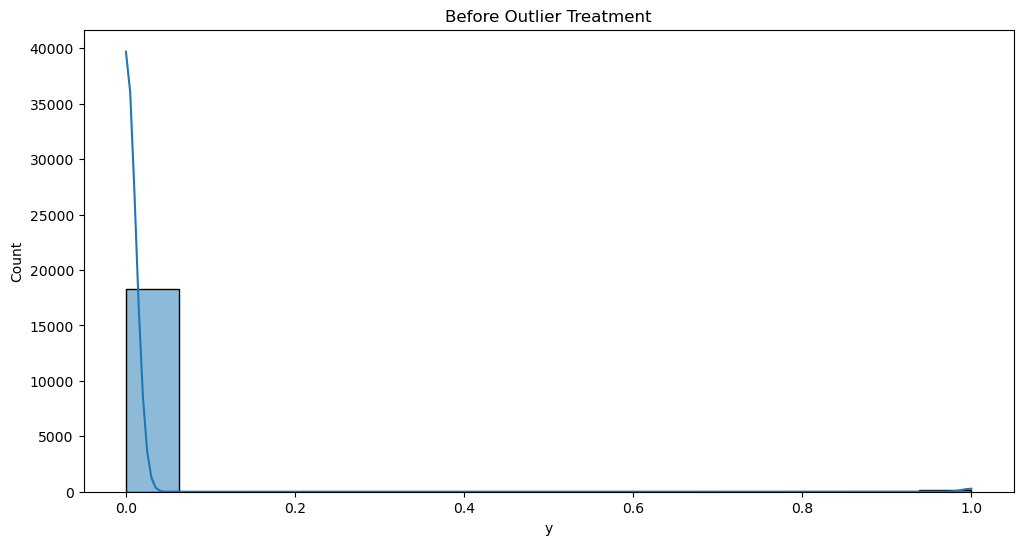

In [7]:
# Visualize the target variable before outlier treatment
visualize_data(data['y'], title='Before Outlier Treatment')

In [8]:
# Treat outliers using z-score method
data_filtered_zscore = treat_outliers_zscore(data['y'])


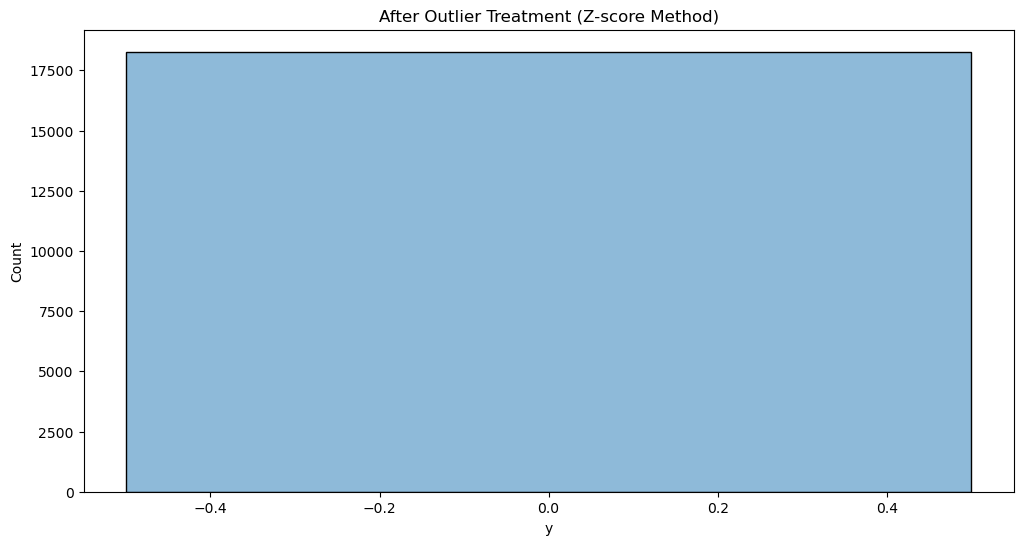

In [9]:
# Visualize the target variable after outlier treatment
visualize_data(data_filtered_zscore, title='After Outlier Treatment (Z-score Method)')

In [11]:
# Step 3: Get the Correct Datatype for Date
data['time'] = pd.to_datetime(data['time'])


In [14]:
# Extract the target variable 'y'
y = data['y']

# Drop the 'time' and 'y' columns from the dataset as they are not predictors
data.drop(columns=['time', 'y'], inplace=True)

# Feature Engineering
# Example 1: Calculating the mean of the 'x' columns
data['x_mean'] = data.mean(axis=1)

# Example 2: Calculating the standard deviation of the 'x' columns
data['x_std'] = data.std(axis=1)

# Example 3: Calculating the maximum value of the 'x' columns
data['x_max'] = data.max(axis=1)

# Example 4: Calculating the minimum value of the 'x' columns
data['x_min'] = data.min(axis=1)

# Example 5: Calculating the range of the 'x' columns
data['x_range'] = data['x_max'] - data['x_min']

# Example 6: Calculating the sum of the 'x' columns
data['x_sum'] = data.sum(axis=1)

# Example 7: Calculating the median of the 'x' columns
data['x_median'] = data.median(axis=1)

# Example 8: Calculating the skewness of the 'x' columns
data['x_skew'] = data.skew(axis=1)

# Example 9: Calculating the kurtosis of the 'x' columns
data['x_kurtosis'] = data.kurtosis(axis=1)

# Example 10: Calculating the variance of the 'x' columns
data['x_var'] = data.var(axis=1)

# Save the modified dataset
data.to_csv('modified_anomadata.csv', index=False)


In [20]:
# Define the feature matrix X
X = data

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Isolation Forest
iforest = IsolationForest(contamination=0.1, random_state=42)
iforest.fit(X_train)

# Predict outliers
y_pred_iforest_train = iforest.predict(X_train)
y_pred_iforest_test = iforest.predict(X_test)


In [24]:
# Convert predictions to binary labels (1 for anomaly, -1 for normal)
y_pred_iforest_train_binary = np.where(y_pred_iforest_train == -1, 1, 0)
y_pred_iforest_test_binary = np.where(y_pred_iforest_test == -1, 1, 0)

In [25]:
# Step 8: Model Evaluation
# Evaluate the model using chosen metrics
accuracy = accuracy_score(y_test, y_pred_iforest_test_binary)
precision = precision_score(y_test, y_pred_iforest_test_binary)
recall = recall_score(y_test, y_pred_iforest_test_binary)
f1 = f1_score(y_test, y_pred_iforest_test_binary)
roc_auc = roc_auc_score(y_test, y_pred_iforest_test_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9940217391304348
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC AUC Score: 0.5


C:\Users\SONY\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
